<a href="https://colab.research.google.com/github/Saptar001/Covid-19/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# hello

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

# **Live Status**

In [3]:
import json
# get response from the web page
response = requests.get('https://api.covid19india.org/data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

In [4]:
# save data in a dataframe
tested = pd.DataFrame(parsed['statewise'])

# first few rows
tested.tail()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
33,50969,528823,2955,0,0,0,16/05/2021 20:48:14,0,474899,Telangana,TG,[July 27] : Telangana bulletin for the previou...
34,4898,40813,428,0,0,0,16/05/2021 21:14:49,23,35464,Tripura,TR,[Aug 4]: Tripura bulletin for the previous day...
35,163003,1619645,17546,0,0,0,16/05/2021 20:48:17,0,1439096,Uttar Pradesh,UP,[Jan 1]:As no bulletin was provided for 31'st ...
36,78802,287286,4811,0,0,0,16/05/2021 21:44:02,5143,198530,Uttarakhand,UT,[Oct 30]: Metric of capturing the testing data...
37,131805,1133430,13284,0,0,0,16/05/2021 20:48:19,0,988341,West Bengal,WB,


In [5]:
# fix datatype
tested['lastupdatedtime'] = pd.to_datetime(tested['lastupdatedtime'])

In [6]:
# save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)


In [7]:
state_test_cases = tested.groupby(['lastupdatedtime','state'])['confirmed','active','recovered',	'deaths'].max().reset_index()

In [8]:
state_test_cases.head(36)

,lastupdatedtime,state,confirmed,active,recovered,deaths
0,2020-07-19 09:40:01,State Unassigned,0,0,0,0
1,2021-05-16 20:47:27,Bihar,651909,75089,572987,3832
2,2021-05-16 20:47:29,Chandigarh,55367,7644,47088,635
3,2021-05-16 20:47:31,Delhi,1393867,62783,1309578,21506
4,2021-05-16 20:47:34,Jammu and Kashmir,244608,51623,189836,3149
5,2021-05-16 20:47:35,Karnataka,2203462,600147,1581457,21837
6,2021-05-16 20:47:37,Kerala,2147968,440649,1700528,6429
7,2021-05-16 20:47:50,Meghalaya,23332,4534,18478,320
8,2021-05-16 20:48:08,Puducherry,84506,17666,65689,1151
9,2021-05-16 20:48:10,Rajasthan,859669,194382,658510,6777


In [9]:
state_test_cases = tested.groupby('state')['confirmed','active','recovered',	'deaths'].max()
#state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')

In [10]:
state_test_cases.head(36)

,confirmed,active,recovered,deaths
state,,,,
Andaman and Nicobar Islands,6603,232,6283,88
Andhra Pradesh,1435491,210436,1215683,9372
Arunachal Pradesh,21802,2263,19461,78
Assam,328629,43377,281726,2179
Bihar,651909,75089,572987,3832
Chandigarh,55367,7644,47088,635
Chhattisgarh,912477,103593,797150,11734
Dadra and Nagar Haveli and Daman and Diu,9653,888,8727,4
Delhi,1393867,62783,1309578,21506


In [11]:
state_test_cases = state_test_cases.apply(pd.to_numeric)

In [12]:
state_test_cases.sort_values('confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Blues',subset=["active"])\
                        .background_gradient(cmap='Blues',subset=["recovered"])\
                        .background_gradient(cmap='Blues',subset=["deaths"])
                       

,confirmed,active,recovered,deaths
state,,,,
Total,24965079,3512674,21167746,274414
Maharashtra,5378452,468109,4826371,81486
Karnataka,2203462,600147,1581457,21837
Kerala,2147968,440649,1700528,6429
Uttar Pradesh,1619645,163003,1439096,17546
Tamil Nadu,1598216,219342,1361204,17670
Andhra Pradesh,1435491,210436,1215683,9372
Delhi,1393867,62783,1309578,21506
West Bengal,1133430,131805,988341,13284


In [13]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')


In [14]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

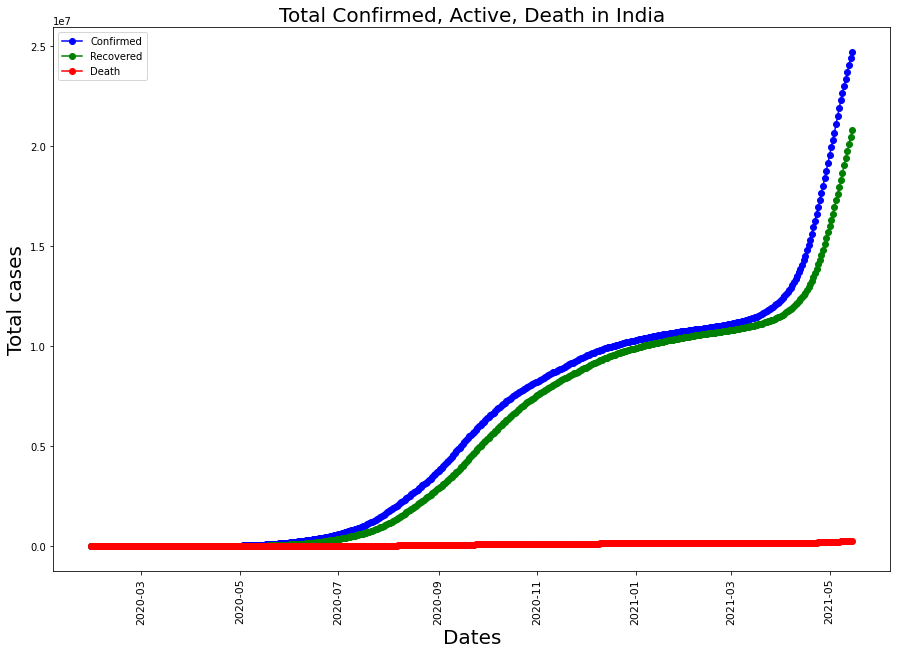

In [15]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

# **FORCASTING** **CASES**

In [16]:
!pip install Prophet

     |████████████████████████████████| 71kB 3.7MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 184kB 9.1MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6640070 sha256=2b1459a28e2a0125c6ac6a21991376fdc03782e1a9042f6292a999b62466eac5
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built Prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [17]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

In [18]:
prop = Prophet(interval_width=0.97)
prop.fit(data)
future = prop.make_future_dataframe(periods=10)
future.tail(10)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
480,2021-05-16
481,2021-05-17
482,2021-05-18
483,2021-05-19
484,2021-05-20
485,2021-05-21
486,2021-05-22
487,2021-05-23
488,2021-05-24
489,2021-05-25


In [19]:
#predicting the future with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
485,2021-05-21,1.978776e+07,1.759632e+07,2.205581e+07
486,2021-05-22,1.989977e+07,1.760590e+07,2.206433e+07
487,2021-05-23,1.992660e+07,1.754613e+07,2.206910e+07
488,2021-05-24,2.002918e+07,1.795181e+07,2.209595e+07
489,2021-05-25,2.013581e+07,1.782823e+07,2.217312e+07


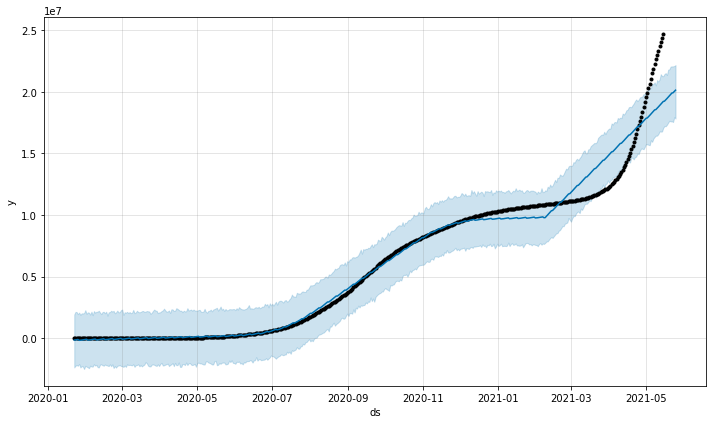

In [20]:
confirmed_forecast_plot = prop.plot(forecast)

# **COMPARING CASES OF INDIA AND IRAN**

In [23]:
countries = ['China','Germany','Russia','Italy','Spain','US','Turkey','France','United Kingdom','India','Argentina','Colombia']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

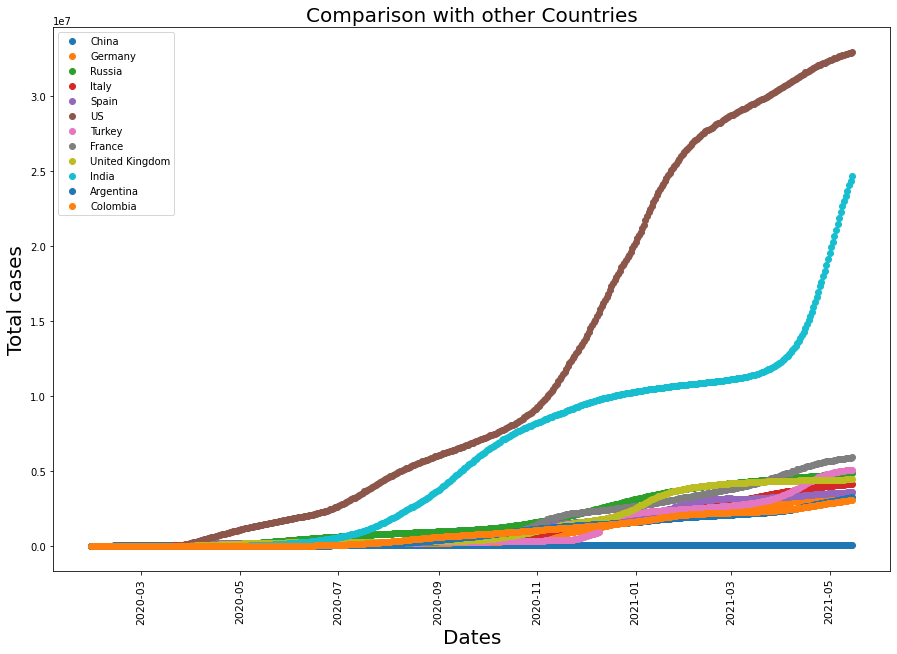

In [24]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();